In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
visa_df=pd.read_csv("Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [8]:
types=visa_df.dtypes.to_dict().items()
cat,num=[],[]
for i,j in types:
    if j=='object':
        cat.append(i)
    else:
        num.append(i)

cat,num
        

(['case_id',
  'continent',
  'education_of_employee',
  'has_job_experience',
  'requires_job_training',
  'region_of_employment',
  'unit_of_wage',
  'full_time_position',
  'case_status'],
 ['no_of_employees', 'yr_of_estab', 'prevailing_wage'])

In [7]:
num=visa_df.select_dtypes(include='object').columns
num

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [13]:
len(visa_df[visa_df['continent']=='Asia'])

16861

In [11]:
count=[]

labels=visa_df['continent'].unique()
for i in labels:
    count.append(len(visa_df[visa_df['continent']==i]))
count
pd.DataFrame(zip(labels,count),columns=['continent','no of applications'])

,continent,no of applications
0,Asia,16861
1,Africa,551
2,North America,3292
3,Europe,3732
4,South America,852
5,Oceania,192


In [25]:
alllabels=[]
allcounts=[]
for i in cat[1:]:
    
    labels=visa_df[i].unique()
    alllabels.append(labels)
    for j in labels:
        allcounts.append(len(visa_df[visa_df[i]==j]))
        
alllabels    
allcounts

[16861,
 551,
 3292,
 3732,
 852,
 192,
 3420,
 9634,
 10234,
 2192,
 10678,
 14802,
 22525,
 2955,
 6586,
 7195,
 7017,
 4307,
 375,
 2157,
 22962,
 272,
 89,
 22773,
 2707,
 8462,
 17018]

In [12]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [28]:
pd.DataFrame(zip([i for i in alllabels],allcounts))

,0,1
0,"[Asia, Africa, North America, Europe, South Am...",16861
1,"[High School, Master's, Bachelor's, Doctorate]",551
2,"[N, Y]",3292
3,"[N, Y]",3732
4,"[West, Northeast, South, Midwest, Island]",852
5,"[Hour, Year, Week, Month]",192
6,"[Y, N]",3420
7,"[Denied, Certified]",9634


In [19]:
pd.DataFrame(zip(labels,count),columns=['Continent','No of Applications'])

,Continent,No of Applications
0,Asia,16861
1,Africa,551
2,North America,3292
3,Europe,3732
4,South America,852
5,Oceania,192


In [35]:
d=visa_df['continent'].value_counts()
keys=d.keys()
values=d.values

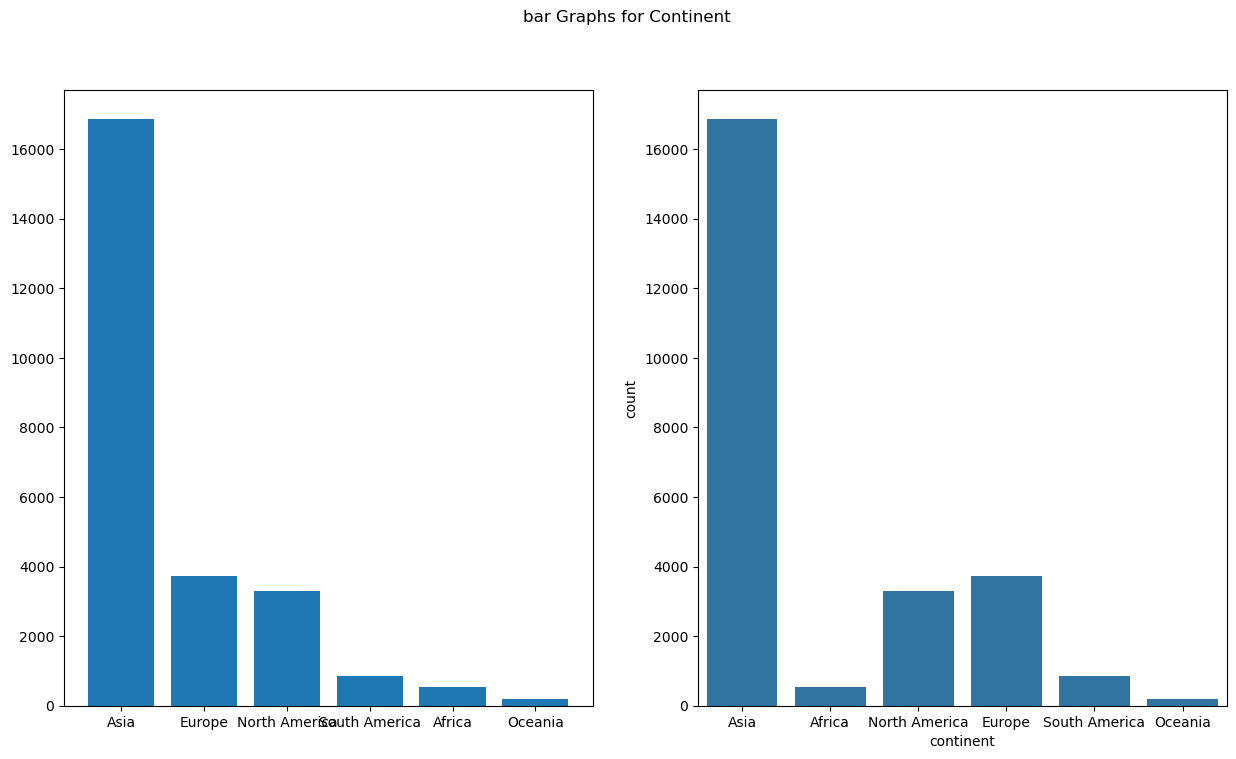

In [47]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
ax[0].bar(keys,values)
sns.countplot(data=visa_df,x='continent',ax=ax[1])
plt.suptitle("bar Graphs for Continent")
plt.show()

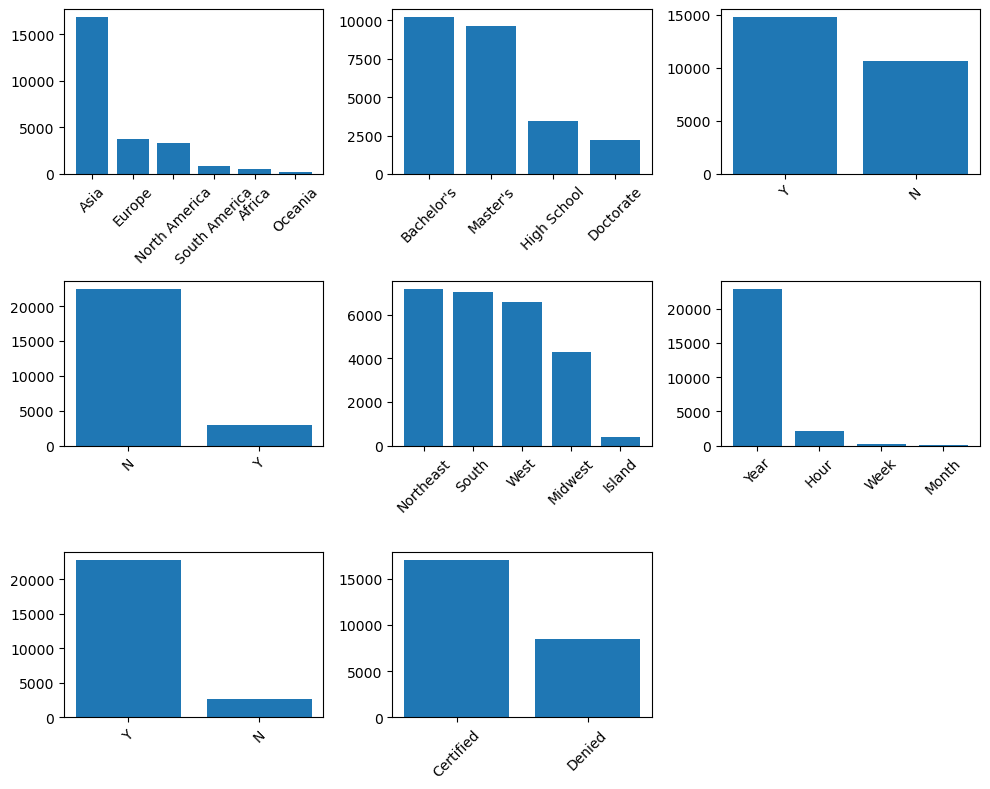

In [60]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,8))

for i in range(1,9):
    keys=visa_df[cat[i]].value_counts().keys()
    values=visa_df[cat[i]].value_counts().values
    
    plt.subplot(3,3,i)
    # sns.countplot(data=visa_df,x=i,palette='pastel')
    plt.bar(keys,values)
    plt.xticks(rotation=45)
    plt.tight_layout()
    

[WinError 183] Cannot create a file when that file already exists: 'categorical_analysis1'


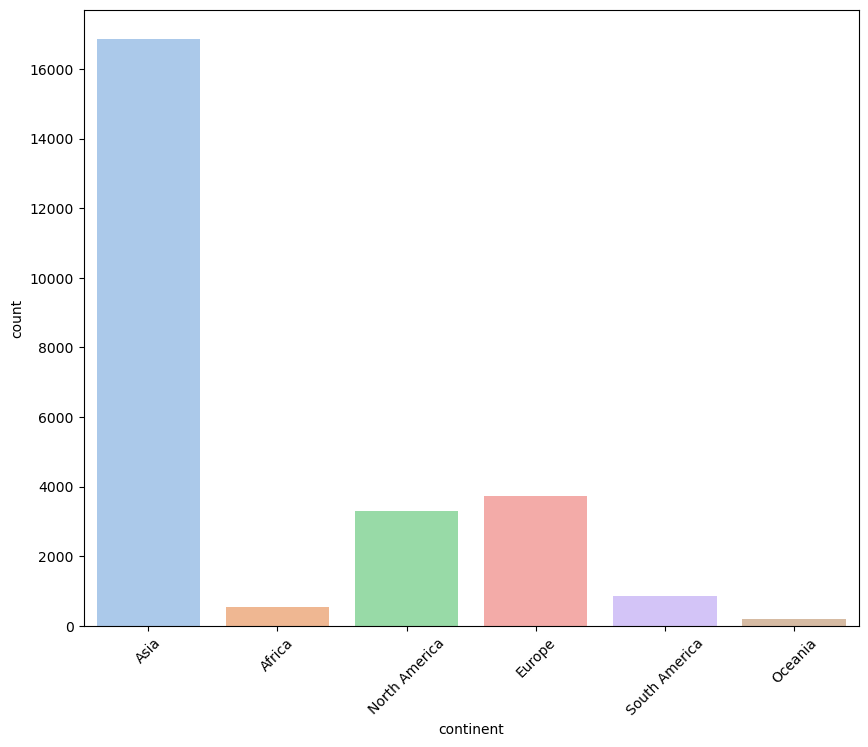

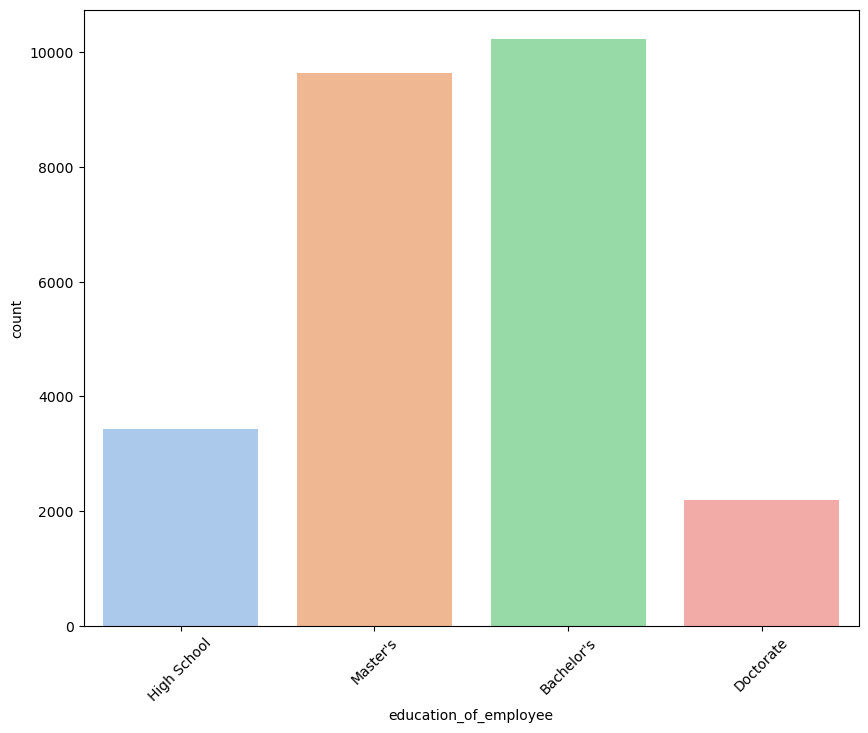

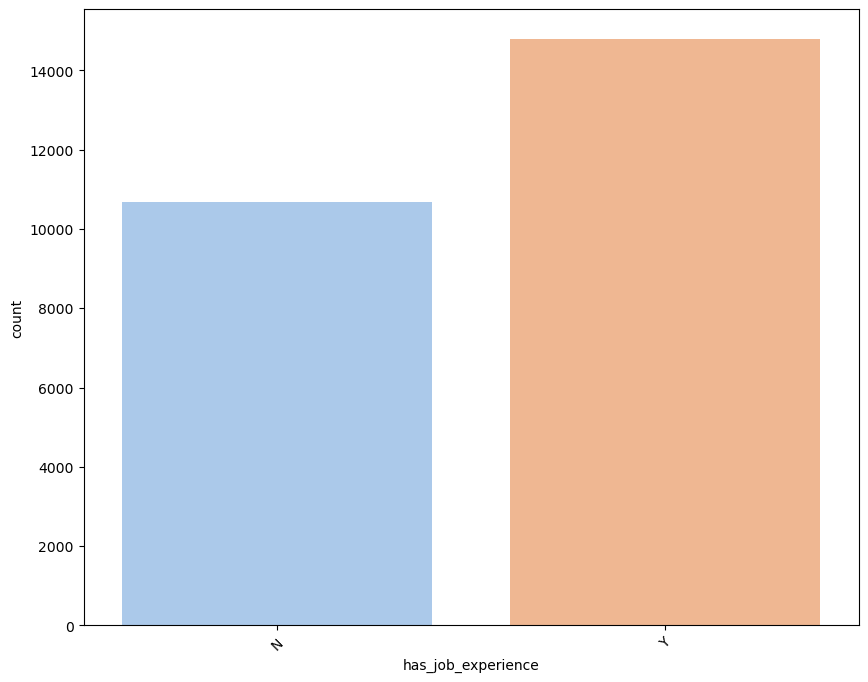

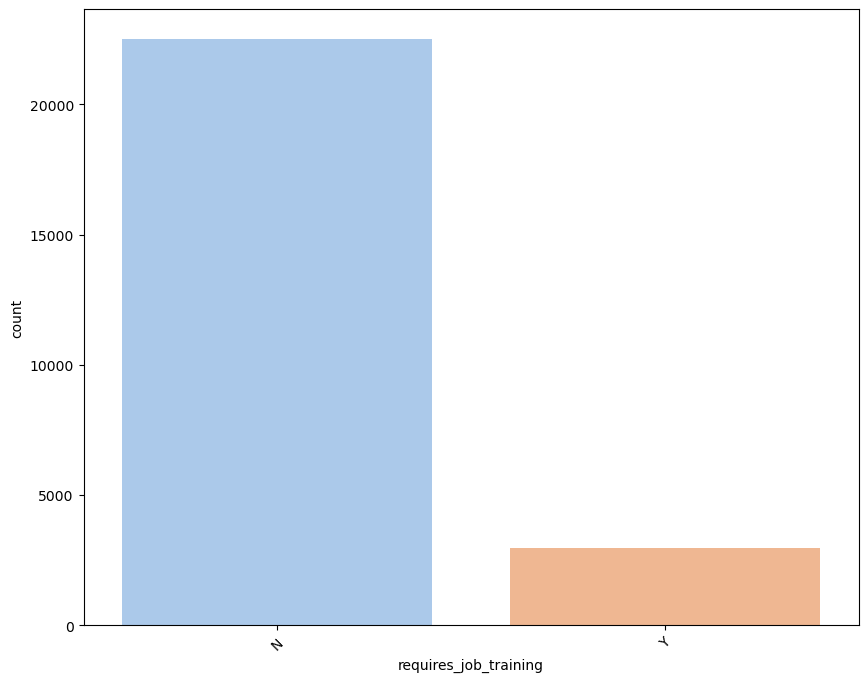

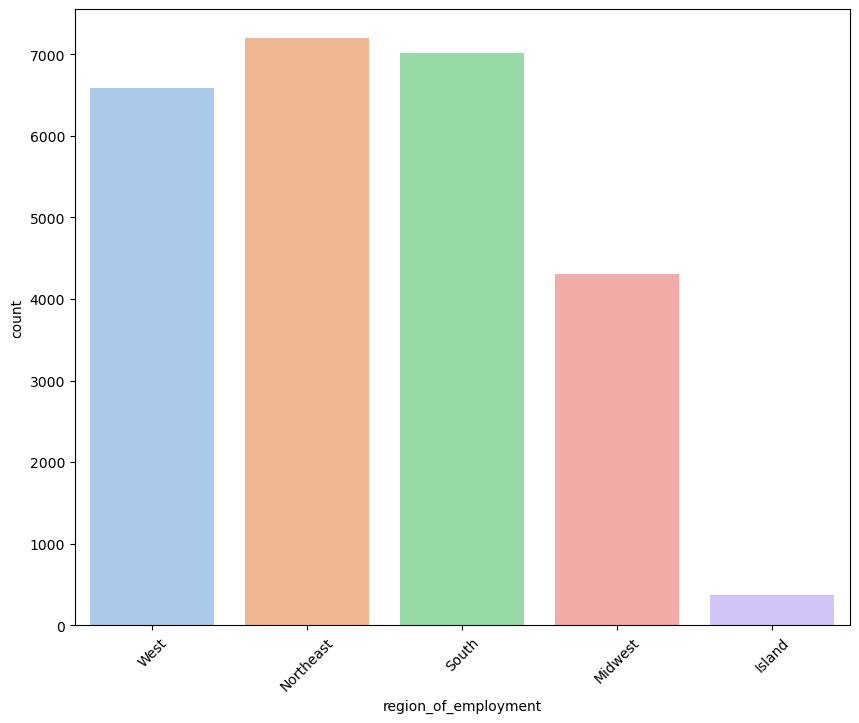

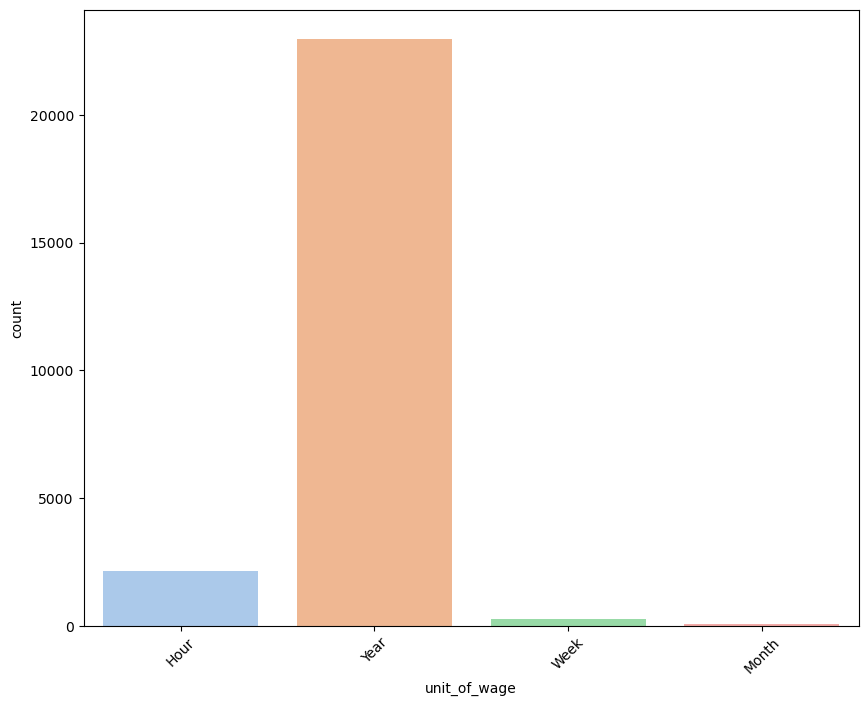

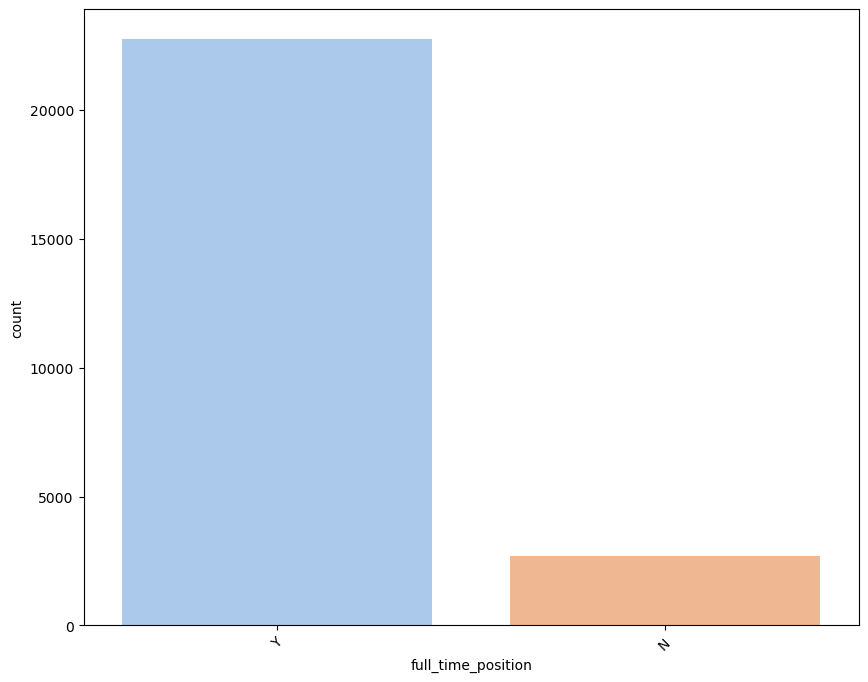

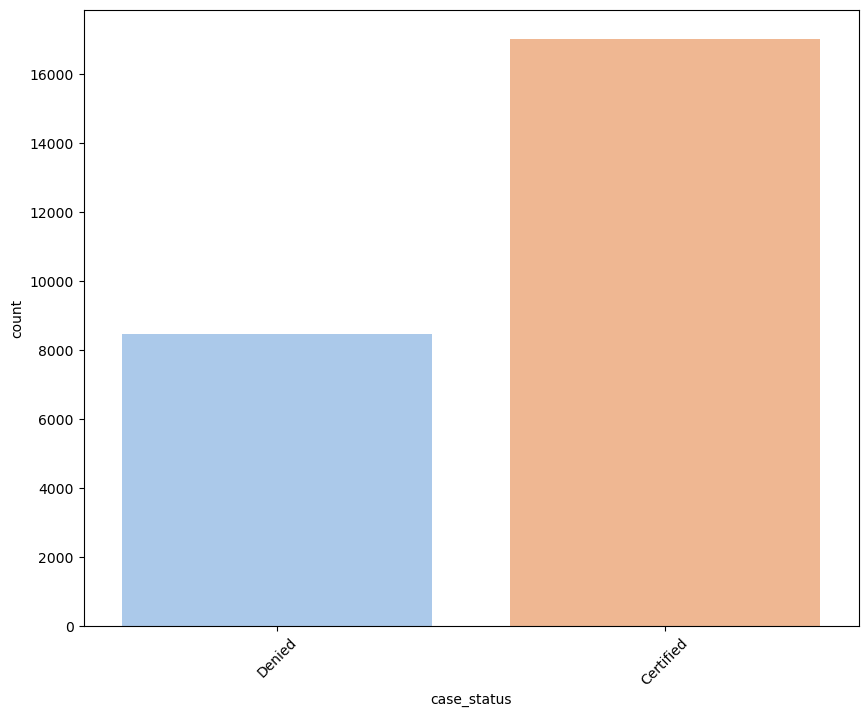

In [70]:
import warnings
import os
warnings.filterwarnings('ignore')


cwd=os.getcwd()

foldername='categorical_analysis1'
try:
    os.makedirs(foldername)
except Exception as e:
    print(e)
path=os.path.join(cwd,foldername)
for i in cat[1:]:
    plt.figure(figsize=(10,8))
    # keys=visa_df[cat[i]].value_counts().keys()
    # values=visa_df[cat[i]].value_counts().values
    # print(pd.DataFrame(zip((keys,values))))
    # plt.subplot(3,3,i)
    sns.countplot(data=visa_df,x=i,palette='pastel')
    path1=f'{i}_analysis.png'
    newpath=os.path.join(path,path1)
    plt.xticks(rotation=45)
    # plt.tight_layout()
    plt.savefig(newpath,dpi=300)
    plt.show()
   

In [71]:
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [72]:
num

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [74]:
wage=visa_df['prevailing_wage']

In [80]:
count=len(wage)
mean=np.mean(wage)
median=np.median(wage)
Min=np.min(wage)
Max=np.max(wage)
p25=np.percentile(wage,25)
p50=np.percentile(wage,50)
p75=np.percentile(wage,75)
std=np.std(wage)

cols=['count','mean','median','min','max','p25','p50','p75','std']
labels=[count,mean,median,Min,Max,p25,p50,p75,std]

pd.DataFrame(labels,index=cols,columns=['prevailing_wage'])

,prevailing_wage
count,25480.000000
mean,74455.814592
median,70308.210000
min,2.136700
max,319210.270000
p25,34015.480000
p50,70308.210000
p75,107735.512500
std,52814.905897


In [83]:
u=wage.mean()
std=wage.std()
lb=u-1*std
ub=u+1*std
con1=wage>lb
con2=wage<ub
con=con1 & con2
visa_df[con]


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.86,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03,Year,Y,Denied
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.56,Year,Y,Certified
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.78,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [89]:
def empirical_rule(n):
    u=wage.mean()
    std=wage.std()
    lb=u-n*std
    ub=u+n*std
    con1=wage>lb
    con2=wage<ub
    con=con1 & con2
    print(len(visa_df[con]))
empirical_rule(3)

25186


In [90]:
wage.mean()==wage.median()

False

**Crosstab**

In [92]:
pd.crosstab(visa_df['continent'],visa_df['case_status'])

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [102]:
certified,denied=[],[]
labels=visa_df['continent'].unique()
for i in labels:

    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    certi_con=con1 & con2
    denied_con=con1&con3
    certified.append(len(visa_df[certi_con]))
    denied.append(len(visa_df[denied_con]))
certified,denied

([11012, 397, 2037, 2957, 493, 122], [5849, 154, 1255, 775, 359, 70])

In [104]:
pd.DataFrame(zip(certified,denied),index=labels,columns=['Certified','Denied'])

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


<Axes: xlabel='continent'>

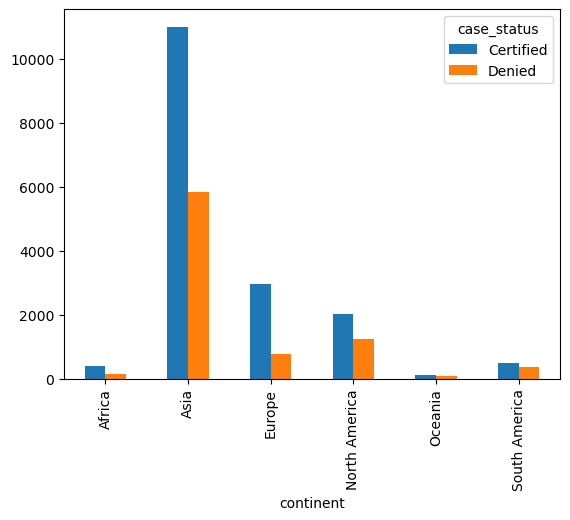

In [106]:
pd.crosstab(visa_df['continent'],visa_df['case_status']).plot(kind='bar')

In [117]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
visa_df['case_status']=le.fit_transform(visa_df['case_status'])
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,1,High School,N,N,14513,2007,West,592.2029,Hour,Y,1
1,EZYV02,1,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,0
2,EZYV03,1,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,1
3,EZYV04,1,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,1
4,EZYV05,0,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,1,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,0
25476,EZYV25477,1,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,0
25477,EZYV25478,1,Master's,Y,N,1121,1910,South,146298.8500,Year,N,0
25478,EZYV25479,1,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,0


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [121]:
visa_df=pd.read_csv("Visadataset.csv")
d={"Certified":0,"Denied":1}
visa_df['case_status']=visa_df['case_status'].map(d)

In [122]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,1
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,0
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,1
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,1
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,0
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,0
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,0
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,0
